## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = combined_results["Mouse ID"].nunique()
print(mice_count)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupe = combined_results.loc[combined_results.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(mice_dupe)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate mouse ID is "g989"


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_df = combined_results[combined_results["Mouse ID"].isin(mice_dupe)==False]
pd.DataFrame(mice_df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = mice_df["Mouse ID"].nunique()
mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen = mice_df.groupby("Drug Regimen")
mean_regimen = regimen["Tumor Volume (mm3)"].mean()
median_regimen = regimen["Tumor Volume (mm3)"].median()
variance_regimen = regimen["Tumor Volume (mm3)"].var()
std_regimen = regimen["Tumor Volume (mm3)"].std()
sem_regimen = regimen["Tumor Volume (mm3)"].sem()

#Assemble the resulting series into a single summary dataframe.
regimen_stat_summary = pd.DataFrame({"Mean": mean_regimen, 
                                "Median": median_regimen, 
                                "Variance": variance_regimen,
                                "Standard Deviation": std_regimen, 
                                "Standard Error of Mean": sem_regimen})

#cleaning format if* neccessary 
regimen_stat_summary["Mean"] = regimen_stat_summary["Mean"].map("{:.3f}".format)
regimen_stat_summary["Median"] = regimen_stat_summary["Median"].map("{:.3f}".format)
regimen_stat_summary["Variance"] = regimen_stat_summary["Variance"].map("{:.3f}".format)
regimen_stat_summary["Standard Deviation"] = regimen_stat_summary["Standard Deviation"].map("{:.3f}".format)
regimen_stat_summary["Standard Error of Mean"] = regimen_stat_summary["Standard Error of Mean"].map("{:.3f}".format)
#print(regimen_summary)
regimen_stat_summary

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

regimen_type = mice_df.groupby("Drug Regimen")
agg_regimen_type = regimen_type["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]) 

#rename columns 
agg_stat_table = agg_regimen_type.rename(columns = {"mean" :"Mean", "median" : "Median", "var" : "Variance", "std": "Standard Deviation", "sem" : "Standard Error of Mean"})

agg_stat_table

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

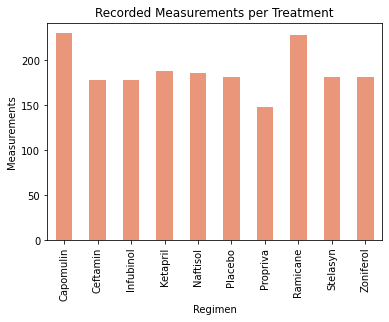

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
treatment_to_mice = regimen["Drug Regimen"].count()
pandas_chart = treatment_to_mice.plot(kind= "bar", title = "Recorded Measurements per Treatment", color = "darksalmon")
pandas_chart.set_xlabel("Regimen")
pandas_chart.set_ylabel("Measurements")
plt.show()

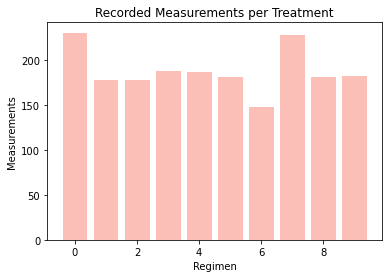

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
y_axis = regimen["Drug Regimen"].count()
x_axis = np.arange(len(regimen))
plt.bar(x_axis, y_axis, color="salmon", alpha = 0.5)

plt.title("Recorded Measurements per Treatment")
plt.xlabel("Regimen")
plt.ylabel("Measurements")
plt.show()

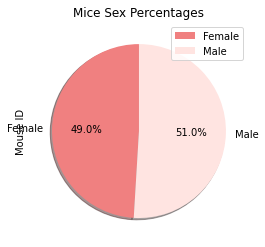

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#create a data frame for gender
colors = ["lightcoral", "mistyrose"]
mice_df.groupby(["Sex"]).count().plot(kind="pie", y="Mouse ID", colors=colors, title="Mice Sex Percentages",
                                      autopct="%1.1f%%", shadow=True, startangle=90 )
plt.show()

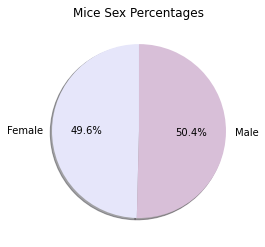

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#determine sex count
gender_count = mice_df.groupby("Sex").nunique()
gender_count
#creat pie chart with plypot
labels = ["Female", "Male"]
sizes = [123, 125]
colors = ["lavender", "thistle"]
explode = (0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle = 90)
plt.title("Mice Sex Percentages")
plt.show()
#????????why are pie chart proportions different?????

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#Capomul Combined DF
capomulin_data = mice_df.loc[mice_df["Drug Regimen"] == "Capomulin"]
capomulin_totals = capomulin_data.groupby("Mouse ID")
capomulin_greatest_tp = capomulin_totals["Tumor Volume (mm3)"].max()
capomulin_least_tp = capomulin_totals["Tumor Volume (mm3)"].min()
cap_calc = capomulin_greatest_tp -capomulin_least_tp
cap_df = pd.DataFrame(cap_calc)
capomulin_stats = pd.merge(mice_df, cap_df, on=("Mouse ID", "Tumor Volume (mm3)"), how = "outer")
                         

#Ramicane Combined DF
ramicane_data = mice_df.loc[mice_df["Drug Regimen"] == "Ramicane"]
ramicane_totals = ramicane_data.groupby("Mouse ID")
ramicane_greatest_tp = ramicane_totals["Tumor Volume (mm3)"].max()
ramicane_least_tp = ramicane_totals["Tumor Volume (mm3)"].min()
ram_calc = ramicane_greatest_tp - ramicane_least_tp
ram_df = pd.DataFrame(ram_calc)
ramicane_stats = pd.merge(mice_df, ram_df, on=("Mouse ID", "Tumor Volume (mm3)"), how = "outer")

#Infubinol Combined DF
infubinol_data = mice_df.loc[mice_df["Drug Regimen"] == "Infubinol"]
infubinol_totals = infubinol_data.groupby("Mouse ID")
infubinol_greatest_tp = infubinol_totals["Tumor Volume (mm3)"].max()
infubinol_least_tp = infubinol_totals["Tumor Volume (mm3)"].min()
inf_calc = infubinol_greatest_tp -infubinol_least_tp
inf_df = pd.DataFrame(inf_calc)
infubinol_stats = pd.merge(mice_df, inf_df, on=("Mouse ID", "Tumor Volume (mm3)"), how = "outer")
                          
                          
#Ceftamin Combined DF
ceftamin_data = mice_df.loc[mice_df["Drug Regimen"] == "Ceftamin"]
ceftamin_totals = ceftamin_data.groupby("Mouse ID")
ceftamin_greatest_tp = ceftamin_totals["Tumor Volume (mm3)"].max()
ceftamin_least_tp = ceftamin_totals["Tumor Volume (mm3)"].min()
ceft_calc = ceftamin_greatest_tp - ceftamin_least_tp
ceft_df = pd.DataFrame(ceft_calc)
ceftamin_stats = pd.merge(mice_df, ceft_df, on=("Mouse ID", "Tumor Volume (mm3)"), how = "outer")          

In [14]:
# Put treatments into a list for for loop??????? (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    

In [15]:
#Capomul quartile calculations
quartiles = capomulin_stats["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cap_lowerq = quartiles[0.25]
cap_upperq = quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq

cap_lower_bound = cap_lowerq - (1.5 * cap_iqr)
cap_upper_bound = cap_upperq + (1.5 * cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

print(f"The lower quartile of the Capomulin Tumor Regimen is: {cap_lowerq}")
print(f"The upper quartile of the Capomulin Tumor Regimen is: {cap_upperq}")
print(f"The interquartile range of the Capomulin Tumor Regimen is: {cap_iqr}")
print(f"The the median of the Capomulin Tumor Regimen is: {quartiles[0.5]} ")



Values below 28.223004015000004 could be outliers.
Values above 72.96165997499999 could be outliers.
The lower quartile of the Capomulin Tumor Regimen is: 45.0
The upper quartile of the Capomulin Tumor Regimen is: 56.18466399
The interquartile range of the Capomulin Tumor Regimen is: 11.184663989999997
The the median of the Capomulin Tumor Regimen is: 48.75311208 


In [16]:
#Ramicane quartile calculations
quartiles = ramicane_stats["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ram_lowerq = quartiles[0.25]
ram_upperq = quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq

ram_lower_bound = ram_lowerq - (1.5 * ram_iqr)
ram_upper_bound = ram_upperq + (1.5 * ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

print(f"The lower quartile of the Ramicane Tumor Regimen is: {ram_lowerq}")
print(f"The upper quartile of the Ramicane Tumor Regimen is: {ram_upperq}")
print(f"The interquartile range of the Ramicane Tumor Regimen is: {ram_iqr}")
print(f"The the median of the Ramicane Tumor Regimen is: {quartiles[0.5]} ")


Values below 28.223004015000004 could be outliers.
Values above 72.96165997499999 could be outliers.
The lower quartile of the Ramicane Tumor Regimen is: 45.0
The upper quartile of the Ramicane Tumor Regimen is: 56.18466399
The interquartile range of the Ramicane Tumor Regimen is: 11.184663989999997
The the median of the Ramicane Tumor Regimen is: 48.75311208 


In [17]:
#Infubinol quartile calculations
quartiles = infubinol_stats["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inf_lowerq = quartiles[0.25]
inf_upperq = quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq

inf_lower_bound = inf_lowerq - (1.5 * inf_iqr)
inf_upper_bound = inf_upperq + (1.5 * inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

print(f"The lower quartile of the Infubinol Tumor Regimen is: {inf_lowerq}")
print(f"The upper quartile of the Infubinol Tumor Regimen is: {inf_upperq}")
print(f"The interquartile range of the Infubinol Tumor Regimen is: {inf_iqr}")
print(f"The the median of the Infubinol Tumor Regimen is: {quartiles[0.5]} ")

Values below 28.223004015000004 could be outliers.
Values above 72.96165997499999 could be outliers.
The lower quartile of the Infubinol Tumor Regimen is: 45.0
The upper quartile of the Infubinol Tumor Regimen is: 56.18466399
The interquartile range of the Infubinol Tumor Regimen is: 11.184663989999997
The the median of the Infubinol Tumor Regimen is: 48.75311208 


In [18]:
#Ceftamin quartile calculations
quartiles = ceftamin_stats["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceft_lowerq = quartiles[0.25]
ceft_upperq = quartiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq

#math is wrong ^^

ceft_lower_bound = ceft_lowerq - (1.5 * ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5 * ceft_iqr)
print(f"Values below {ceft_lower_bound} could be outliers.")
print(f"Values above {ceft_upper_bound} could be outliers.")

print(f"The lower quartile of the Ceftamin Tumor Regimen is: {ceft_lowerq}")
print(f"The upper quartile of the Ceftamin Tumor Regimen is: {ceft_upperq}")
print(f"The interquartile range of the Ceftamin Tumor Regimen is: {ceft_iqr}")
print(f"The the median of the Ceftamin Tumor Regimen is: {quartiles[0.5]} ")

Values below 28.223004015000004 could be outliers.
Values above 72.96165997499999 could be outliers.
The lower quartile of the Ceftamin Tumor Regimen is: 45.0
The upper quartile of the Ceftamin Tumor Regimen is: 56.18466399
The interquartile range of the Ceftamin Tumor Regimen is: 11.184663989999997
The the median of the Ceftamin Tumor Regimen is: 48.75311208 


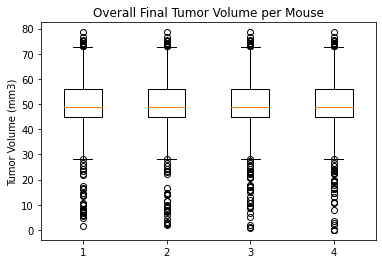

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
cap_plot = capomulin_stats["Tumor Volume (mm3)"]
ram_plot = ramicane_stats["Tumor Volume (mm3)"]
inf_plot = infubinol_stats["Tumor Volume (mm3)"]
ceft_plot = ceftamin_stats["Tumor Volume (mm3)"]
regimen_plot =[cap_plot,ram_plot,inf_plot,ceft_plot]


fig1, axl = plt.subplots()
axl.set_title("Overall Final Tumor Volume per Mouse")
axl.set_ylabel("Tumor Volume (mm3)")
axl.boxplot(regimen_plot)
plt.show()

## Line and Scatter Plots

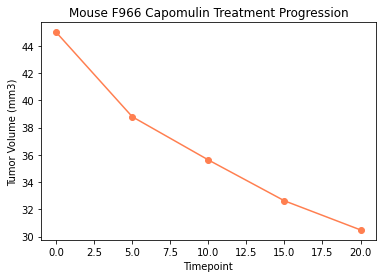

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_treated_mouse = mice_df.loc[mice_df["Mouse ID"] == "f966"]

x_axis = cap_treated_mouse["Timepoint"]
y_axis = cap_treated_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, marker = "o", color = "coral")
plt.title("Mouse F966 Capomulin Treatment Progression")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

#happy mouse, tumor volume decreased!

Text(0, 0.5, 'Tumor Volume (mm3)')

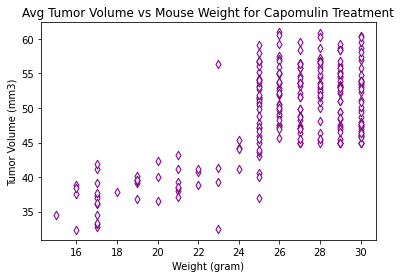

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mice = capomulin_stats.groupby(["Mouse ID"])
cap_avg_tum = cap_mice.mean() 

x = cap_avg_tum["Weight (g)"]
y = cap_avg_tum["Tumor Volume (mm3)"]

plt.scatter(x, y, marker = "d", facecolor = "lavender", edgecolor = "purple")
plt.title("Avg Tumor Volume vs Mouse Weight for Capomulin Treatment")
plt.xlabel("Weight (gram)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
